In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # 모든 null data를 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked가 null data이므로 채워주기

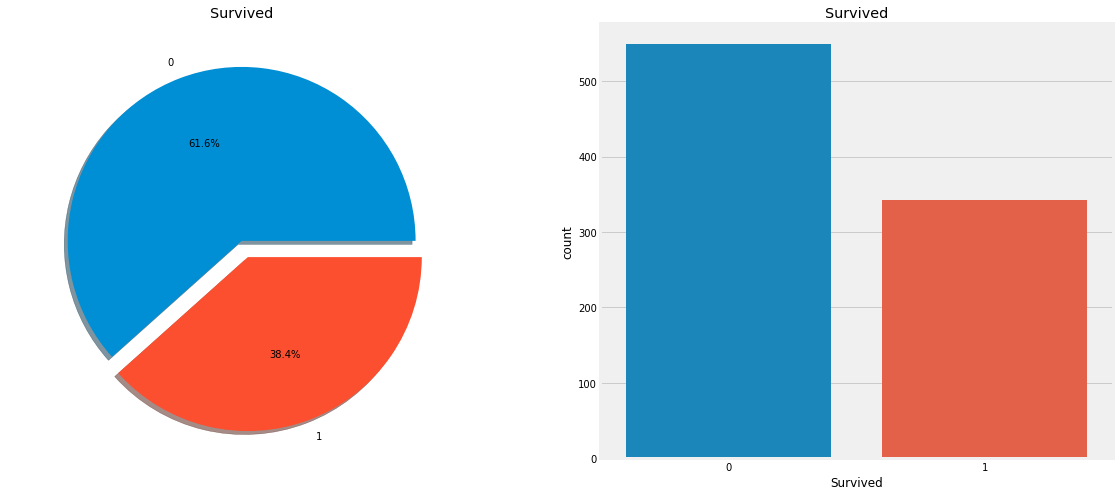

In [5]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data = data, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

- 891명중 38.4%만 생존, 각 class별로 생존과 어떤 상관관계가 있는지 파악해야 한다.
- 그러기 위해서 먼저 특성들의 type를 알아야 한다.

## type of Features
- categorical Feature
    - 범주형 자료 : 두 개 이상의 범주가 있는 변수이다. 
    - Sex (male, female), Embarked(S, C, Q) 등이 여기에 속한다. 
- ordinal Feature(순서형 특성)
    - 범주형 자료와 비슷하지만 각각의 값 간의 상대적 순서 지정 또는 정렬이 가능 (ex : 높음, 중간, 짧음)
    - Pclass (1,2,3)등이 여기에 속함
- continous Feature
    - 연속적으로 나오는 데이터, 항상 최소, 최대값의 사이값들을 구할 수 있다 .
    - age가 여기 속한다.

### Sex -> categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

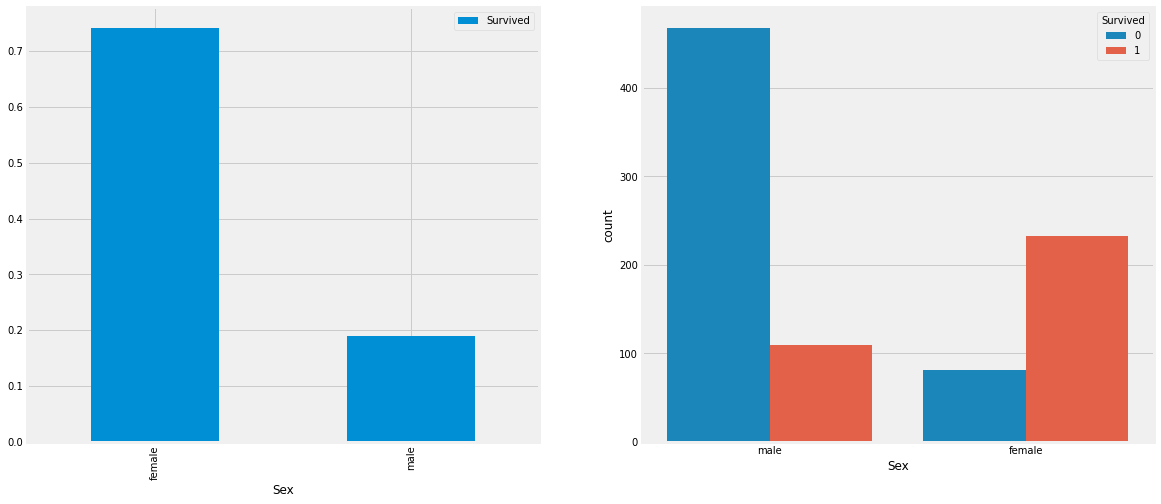

In [7]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
plt.show()

- 남자보다 여자의 생존율이 더 높다.
- 중요한 특성중 하나로 보인다. 
### Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins =True).style.background_gradient(cmap = 'cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass', ylabel='count'>

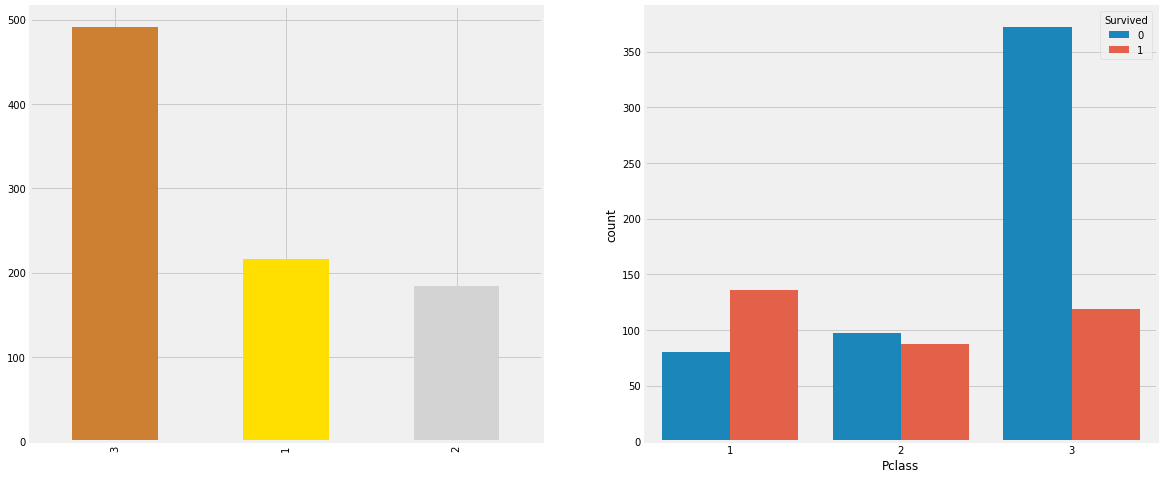

In [9]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
sns.countplot('Pclass', hue = 'Survived', data = data)

- Pclass가 1인 사람, 즉 부자들이 더 많이 살았다. 
- sex와 Pclass를 같이 비교

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap='cool')

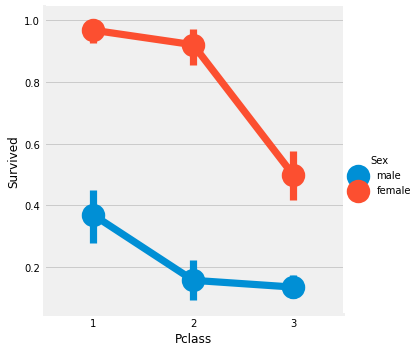

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

- 범주형 데이터를 쉽게 분리가능하기 때문에 factorplot를 사용
- 1등석인데도 남자는 생존률이 낮은걸 확인
### age -> Continous Feature

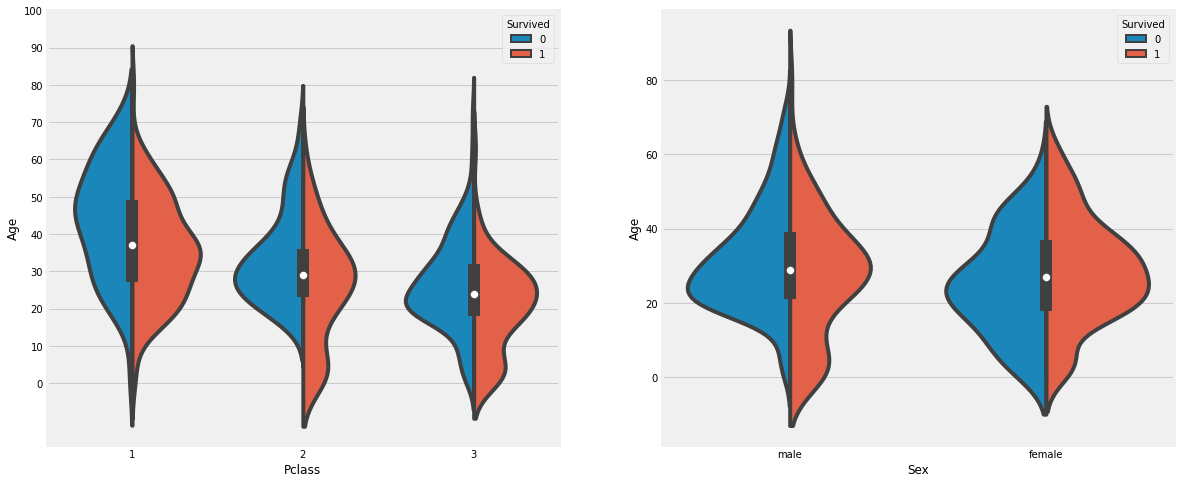

In [12]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
sns.violinplot('Pclass','Age', hue = 'Survived', data= data, split = True, ax = ax[0])
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data= data, split = True, ax = ax[1])
plt.show()

- age에는 177개의 null데이터가 존재함, 이 값들을 채우기 위해선 평균값을 사용할 수도 있지만 차이가 너무 난다. 4살을 29살로 지정할 수도 있다.
- 해결방법으로 이름을 보고 나이의 평균값을 각각의 그룹으로 지정할 수 있다. 
- !! 중요 !! 미국은 Mr,Mrs, Dr, Major 등 나이를 특정할 수 있는 부분이 있다. 

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # 정규식 사용, dot(.)뒤에 문자열 찾기

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 철자가 틀린 Mile, Mme들이 있어 범주화 시킨다.

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- 이제 null data를 채우면 된다. 

In [17]:
data.loc[(data.Age.isnull()&data.Initial == 'Mr'), 'Age']=33
data.loc[(data.Age.isnull() &data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any() # d이게 왜 True가 나오지

True

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64